In [1]:
import torch
from PIL import Image
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [2]:
path = '3주차-PBL-data/'
train_meta = pd.read_pickle(path+'train.pkl')
valid_meta = pd.read_pickle(path+'valid.pkl')
train_meta.head()

,n,potential,position,img_path
0,5,0.226,"[81, 117, 150, 182, 218]",train/image_0.png
1,7,0.448,"[93, 114, 132, 150, 167, 185, 206]",train/image_1.png
2,5,0.341,"[97, 125, 150, 174, 202]",train/image_2.png
3,8,0.390,"[82, 104, 123, 141, 158, 176, 195, 217]",train/image_3.png
4,8,0.404,"[83, 105, 124, 141, 158, 175, 194, 216]",train/image_4.png


In [19]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, train = True, transforms = None):
        self.data_dir = data_dir
        if train:
            self.data = train_meta
        else:
            self.data = valid_meta
        self.target_n = self.data.n
        self.target_potential = self.data.potential
        if transforms == None:
            self.transform = torch.Tensor
        else:
            self.transform = transforms
        
        
    def __len__(self):
        return len(self.target_n)
    
    def __getitem__(self, idx):
        with Image.open(self.data_dir + self.data.img_path[idx]) as img_data:
            self.input = np.array(img_data)
        img = self.transform(self.input)
        label_n = self.transform(np.array([self.target_n[idx]]))
        label_potential = self.transform(np.array([self.target_potential[idx]]))
        return img, torch.tensor([label_n, label_potential])
    

In [20]:
train_dataset = CustomDataset(path, train=True)
valid_dataset = CustomDataset(path, train = False)

In [38]:
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle=False)

shape of X: torch.Size([5, 10, 300])
Shape of y: torch.Size([5, 2])


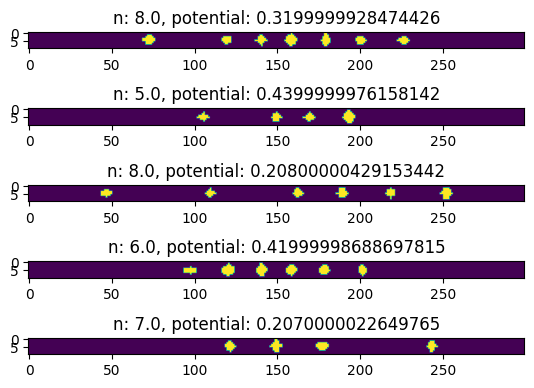

In [44]:
iterator = iter(train_loader)
X, y = next(iterator)
print('shape of X:', X.shape)
print('Shape of y:', y.shape)

for i in range(batch_size):
    plt.subplot(batch_size, 1, i+1)
    plt.imshow(X[i])
    plt.title('n: {}, potential: {}'.format(y[i][0], y[i][1]))
